# Trabalho Final Machine Learning - Classificação de porte ou não de doença cardíaca

## Aluno: Carlos Henrique Pinheiro Cordeiro

---

### O trabalho consiste em utilizar três técnicas de aprendizado de máquina, para classificar se um paciente possui ou não uma doença cardíaca. As técnicas escolhidas foram KNN, Random Forest e SVM (Support Vector Machines).
#### Link para download do dataset utilizado: https://archive.ics.uci.edu/dataset/45/heart+disease

---

### Primeiramente deve se estabelecer uma base para as três técnicas. Consistindo em resgatar os dados desejados, para que seja realizado um pré-processamento
### Iniciando pelo resgate dos dados para um dataframe do Pandas

In [18]:
import pandas as pd
import numpy as np
aColunas = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
oDfDados = pd.read_csv("dataset/processed.cleveland.data", names=aColunas, na_values='?')

### Agora, se tem o pré-processamento dos dados, limpando valores nulos e realizando separações dos conjuntos de teste e treinamento

In [42]:
from sklearn.model_selection import train_test_split
oDfDados = oDfDados.dropna()

aX = oDfDados.drop("target", axis=1)
aX.replace('?', np.nan, inplace=True)
aX = aX.astype(float)
aX.fillna(aX.mean(), inplace=True)
aY = oDfDados["target"]

xTreinamento, xTeste, yTreinamento, yTeste = train_test_split(aX, aY, test_size=0.2, random_state=42)

### Etapa de padronização/normalização dos dados, para modelos que necessitam deste tratamento, como neste caso KNN e SVM

In [43]:
from sklearn.preprocessing import StandardScaler

oScaler                 = StandardScaler()
xTreinamentoNormalizado = oScaler.fit_transform(xTreinamento)
xTesteNormalizado       = oScaler.transform(xTeste)

### A partir daqui, com a base estabelecida (dados obtidos e limpos) pode-se dar início a etapa de testes com os três modelos selecionados: KNN, Random Forest e SVM

---------------------------------------------------------

# KNN

### Criação do modelo KNN para o melhor K definido de forma iterativa

O melhor K definido é: 0.7, tendo como K = 2
0.7


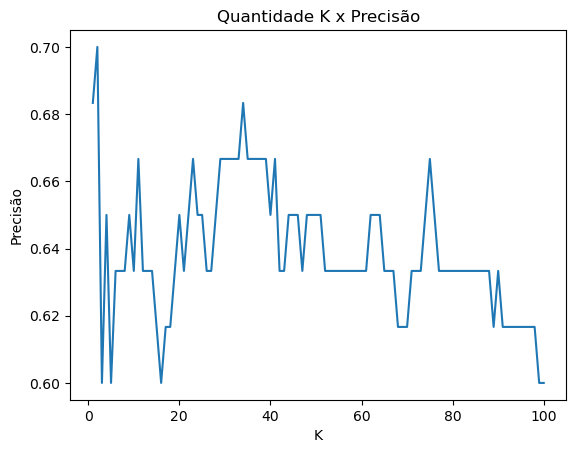

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
 
aValoresK = np.array([]);
for k in range(1, 101):
    aValoresK = np.append(aValoresK, [KNeighborsClassifier(n_neighbors=k).fit(xTreinamentoNormalizado, yTreinamento).score(xTesteNormalizado, yTeste)])

print("O melhor K definido é: "+str(aValoresK.max())+", tendo como K = "+str(aValoresK.argmax()+1))

oModeloKnn = KNeighborsClassifier(n_neighbors=aValoresK.argmax()+1);
oModeloKnn.fit(xTreinamentoNormalizado, yTreinamento)
print(oModeloKnn.score(xTesteNormalizado, yTeste))

plt.plot(np.arange(1, 101), aValoresK)

plt.xlabel('K')
plt.ylabel('Precisão')
plt.title('Quantidade K x Precisão')

plt.show()


### Avaliação do modelo KNN

In [45]:
yPrevistoKnn = oModeloKnn.predict(xTesteNormalizado)

iAcuracia = accuracy_score(yTeste, yPrevistoKnn)
print(f"Acurácia: {iAcuracia:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoKnn))

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoKnn))


Acurácia: 0.70

Matriz de Confusão:
[[35  1  0  0  0]
 [ 2  6  1  0  0]
 [ 3  2  0  0  0]
 [ 3  2  1  1  0]
 [ 1  2  0  0  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.46      0.67      0.55         9
           2       0.00      0.00      0.00         5
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         3

    accuracy                           0.70        60
   macro avg       0.45      0.36      0.33        60
weighted avg       0.66      0.70      0.64        60



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----

# Random Forest

### Criação do modelo, definindo qual o melhor número para "n_estimators" de forma iterativa

O melhor resultado definido foi: 0.6166666666666667, para 'n_estimators' igual a  17


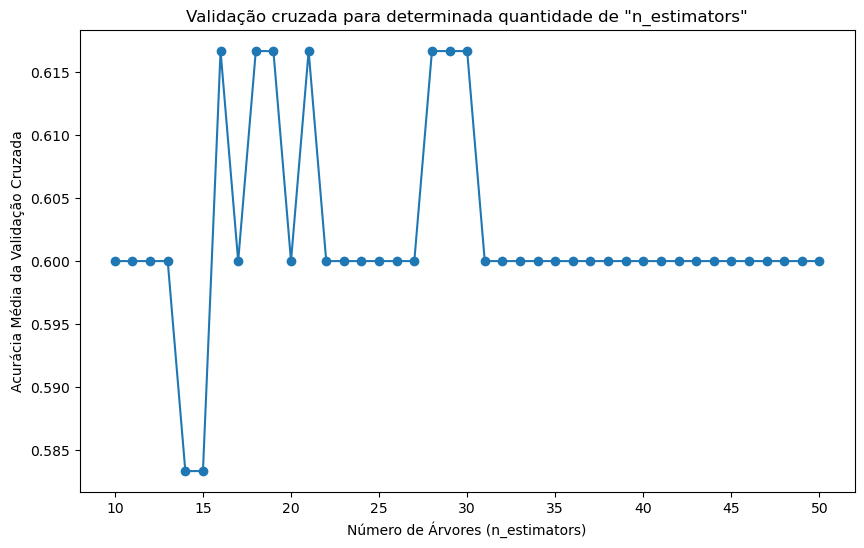

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

aEstimators = np.array([])
for iEstimators in range(10, 51):
    oRandomForest = RandomForestClassifier(n_estimators=iEstimators, random_state=42)
    oRandomForest.fit(xTreinamento, yTreinamento)
    aPontuacao = cross_val_score(oRandomForest, xTeste, yTeste, cv=3, scoring='accuracy')
    aEstimators = np.append(aEstimators, [np.mean(aPontuacao)])

print("O melhor resultado definido foi: "+str(aEstimators.max())+", para 'n_estimators' igual a  "+str(aEstimators.argmax()+11))

oRandomForest = RandomForestClassifier(n_estimators=aEstimators.argmax()+11, random_state=42)
oRandomForest.fit(xTreinamento, yTreinamento)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(10, 51, 1), aEstimators, marker='o')
plt.title('Validação cruzada para determinada quantidade de "n_estimators"')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia Média da Validação Cruzada')
plt.show()

### Avaliação do modelo Random Forest

In [47]:
yPrevistoRandomForest = oRandomForest.predict(xTeste)

iAcuraciaRandomForest = accuracy_score(yTeste, yPrevistoRandomForest)
print(f"Acurácia (Random Forest): {iAcuraciaRandomForest:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoRandomForest))

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoRandomForest))

Acurácia (Random Forest): 0.62

Matriz de Confusão:
[[36  0  0  0  0]
 [ 5  0  3  1  0]
 [ 2  1  1  1  0]
 [ 0  5  1  0  1]
 [ 2  1  0  0  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        36
           1       0.00      0.00      0.00         9
           2       0.20      0.20      0.20         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.20      0.24      0.22        60
weighted avg       0.50      0.62      0.55        60



---

# Support Vector Machines

### Criação do modelo, buscando o melhor valor de "C", para uma melhor acurácia, utilizando a pesquisa em grade (Grid Search)

#### Este valor corresponde ao coeficiente de regularização do modelo, sendo um parâmetro que tem como função evitar o overfitting. Controlando o "trade-off" entre ter certa devisão e classificar corretamente os pontos de treinamento

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

aValoresC           = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
aParametrosPesquisa = {'C': aValoresC, 'kernel': ['linear']}
oModeloSvm          = SVC()
aPesquisa           = GridSearchCV(oModeloSvm, aParametrosPesquisa, cv=5, scoring='accuracy')
aPesquisa.fit(xTreinamentoNormalizado, yTreinamento)

iC = aPesquisa.best_params_['C']
print(f'Melhor valor de C encontrado: {iC}')


Melhor valor de C encontrado: 0.1


### Treinamento do modelo com o melhor valor encontrado para C

In [49]:
oModeloSvm = SVC(kernel='linear', C=iC, random_state=42)
oModeloSvm.fit(xTreinamentoNormalizado, yTreinamento)

SVC(C=0.1, kernel='linear', random_state=42)

### Avaliação do modelo SVM

In [50]:
yPrevistoSvm = oModeloSvm.predict(xTesteNormalizado)

iAcuráciaSvm = accuracy_score(yTeste, yPrevistoSvm)
print(f"Acurácia (SVM): {iAcuráciaSvm:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(yTeste, yPrevistoSvm))

print("\nRelatório de Classificação:")
print(classification_report(yTeste, yPrevistoSvm))


Acurácia (SVM): 0.63

Matriz de Confusão:
[[35  0  0  1  0]
 [ 5  1  1  2  0]
 [ 1  0  2  2  0]
 [ 2  2  3  0  0]
 [ 2  0  0  1  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.33      0.11      0.17         9
           2       0.33      0.40      0.36         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.29      0.30      0.28        60
weighted avg       0.54      0.63      0.57        60



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

### Agora que estão criados os três modelos, chega o momento de comparar qual se saiu melhor para atender este contexto